In [1]:
%matplotlib inline

## 9.2 Tree-Based Methods

### 9.2.1 Background

Tree-based methods partition the feature space into a set of rectangles, and
then fit a simple model (for e.g. a constant) in each one.

Notations:
- $T$ is a tree
- The nodes are indexed by $t$
- The terminal nodes (also called leaf) are indexed by $m$
- The variables are indexes by $j$ 
- The splits of variables are indexed by $s$
- The split $s$ of the quantitative variable $j$ resulting in two regions $R_{L}^{(t)}(j,s)$ and $R_{R}^{(t)}(j,s)$ at node $t$
- For sake of clarity, even if the binary variables have one possible split we keep the same notation used for the qualitative variables.
- $R_m$ is the region of the terminal node $m$ (or leaves)
- $L$ is the loss function with $L(T)$ loss calculated on all the leaves of $T$ and $L(t)$ the loss at node $t$

#### CART algorithm

##### Definition

At each node find the pair $(j,s)$ (for a binary variable $s$ is already known) that minimizes $L(t)$.

On a branch, the algorithm stops when $L$ is null or the region has only one observation, the  node becomes a terminal node.

The algorithm is finished when all the branches have a terminal node.

##### Example

For e.g., the branch at the left branch of the tree has two nodes $t_0$ and $t_1$ and a terminal node $t_2$. The variables selected (with the cost function $C$) are $X_0$, $X_1$ and $X_2$ with $X_1$ a binary variable and the other two are quantitative variables.

1) First split: 

$R_L^{\left(t_0\right)}\left(0,s\right)=\left\{x\in\mathcal{X}|X_0\le s\right\}$ and $R_R^{\left(t_0\right)}\left(0,s\right)=\left\{x\in\mathcal{X}|X_0 > s\right\}$

2) Second split: 

$R_L^{\left(t_1\right)}\left(1,s\right)=\left\{x\in\mathcal{X}|R_L^{\left(t_0\right)}\left(0,s\right)\land\left(X_1=1\right)\right\}$ and $R_R^{\left(t_1\right)}\left(1,s\right)=\left\{x\in\mathcal{X}|R_L^{\left(t_0\right)}\left(0,s\right)\land\left(X_1=0\right)\right\}$

3) Third split:

$R_L^{\left(t_2\right)}\left(1,s\right)=\left\{x\in\mathcal{X}|R_L^{\left(t_1\right)}\left(1,s\right)\land\left(X_2\le s\right)\right\}$ and $R_R^{\left(t_2\right)}\left(1,s\right)=\left\{x\in\mathcal{X}|R_L^{\left(t_1\right)}\left(1,s\right)\land\left(X_2 > s\right)\right\}$

The region $R_L^{\left(t_2\right)}$ is a terminal as it has only one observation OR the loss function applied on $R_L^{\left(t_2\right)}$ is equal to 0.

### 9.2.2 Regression Trees

#### Model

$$\hat{f}\left(x\right)=\sum_{m=1}^{M}{\hat{c}_m1_{\left\{x\in R_m\right\}}} \tag {9.10}$$

With ${\hat{c}}_m=mean\left(y_i|i,x_i\in R_m\right)$

#### Loss function

At each node $t$ we seek to find the pair $(j,s)$ such that,

$$\underset{j,s}{argmin}{\left[\underset{c_1}{min}{\sum_{i|x_i\in R_{L}^{(t)}\left(j,s\right)}\left(y_i-c_1\right)^2}+\underset{c_2}{min}{\sum_{i|x_i\in R_{R}^{(t)}\left(j,s\right)}\left(y_i-c_2\right)^2}\right]} \tag {9.13}$$

The inner minimization is the conditional mean $Y|X$ (i.e. square loss minimization of dummy regressor) then,

$$\underset{j,s}{argmin}{\left[mean\left(y_i|i,x_i\in R_{L}^{(t)}\left(j,s\right)\right)+mean\left(y_i|i,x_i\in R_{R}^{(t)}\left(j,s\right)\right)\right]} \tag {9.14}$$

Therefore, for the two child nodes of node $t$,

$L\left(t\right)=\sum_{i|x_i\in R_L^{(t)}}\left(y_i-{\hat{c}}_{R_L^{\left(t\right)}}\right)^2+\sum_{i|x_i\in R_R^{(t)}}\left(y_i-{\hat{c}}_{R_R^{\left(t\right)}}\right)^2$

And for the tree $T$,

$L\left(T\right)=\sum_{m=1}^{|T|}\sum_{i|x_i\in R_m}\left(y_i-{\hat{c}}_{R_m}\right)^2$

##### Example: 

Simple example to illustrate the CART algorithm for the regression tree.

In [2]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

X, y = load_diabetes(return_X_y=True)

reg_tree = DecisionTreeRegressor(criterion="squared_error",
                                 max_depth=2).fit(X, y)

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt

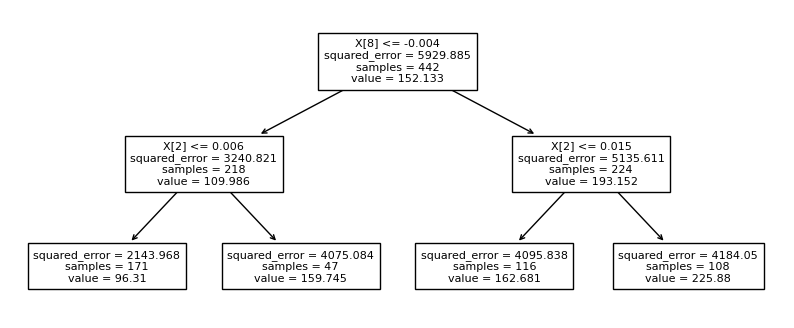

In [4]:
plt.figure(figsize=(10,4))
tree.plot_tree(reg_tree, fontsize=8)
plt.show()

In [5]:
import numpy as np

In [6]:
# Root node selected variable
X_0 = 8
# Root node selected split
s_0 = -0.004 

# Split the data
mask_0_left = X[:, X_0] <= s_0
mask_0_right = X[:, X_0] > s_0

# Left region constant fit
c_0_left = np.mean(y[mask_0_left])
# Left region residual sum of squared
rss_0_left = np.mean((c_0_left - y[mask_0_left])**2)

# Right region constant fit
c_0_right = np.mean(y[mask_0_right])
# Right region residual sum of squared
rss_0_right = np.mean((c_0_right - y[mask_0_right])**2)

print("For the root node:")
print(f"The best pair (variable, split) is ({X_0},{s_0})")
print(f"The left child node has a mean squared error of {rss_0_left:.3f}"
      f" with a constant equal to {c_0_left:.3f}")
print(f"The right child node has a mean squared error of {rss_0_right:.3f}"
      f" with a constant equal to {c_0_right:.3f}")

For the root node:
The best pair (variable, split) is (8,-0.004)
The left child node has a mean squared error of 3240.821 with a constant equal to 109.986
The right child node has a mean squared error of 5135.611 with a constant equal to 193.152


In [7]:
# Node selected variable
X_1 = 2
# Node selected split
s_1 = 0.006

# Split the data
mask_1_left = np.logical_and((X[:, X_0] <= s_0), (X[:, X_1] <= s_1))
mask_1_right = np.logical_and((X[:, X_0] <= s_0), (X[:, X_1] > s_1))

# Left region constant fit
c_1_left = np.mean(y[mask_1_left])
# Left region residual sum of squared
rss_1_left = np.mean((c_1_left - y[mask_1_left])**2)

# Right region constant fit
c_1_right = np.mean(y[mask_1_right])
# Right region residual sum of squared
rss_1_right = np.mean((c_1_right - y[mask_1_right])**2)

print("For the first left node:")
print(f"The best pair (variable, split) is ({X_1},{s_1})")
print(f"The left child node has a mean squared error of {rss_1_left:.3f}"
      f" with a constant equal to {c_1_left:.3f}")
print(f"The right child node has a mean squared error of {rss_1_right:.3f}"
      f" with a constant equal to {c_1_right:.3f}")

For the first left node:
The best pair (variable, split) is (2,0.006)
The left child node has a mean squared error of 2143.968 with a constant equal to 96.310
The right child node has a mean squared error of 4075.084 with a constant equal to 159.745


### 9.2.3 Classification Trees

#### Model

$$\hat{f}\left(x\right)={\hat{k}}_m1_{\left\{x\in R_m\right\}}$$

With ${\hat{k}}_m=\underset{k\in\mathcal{G}}{argmax} \; {{\hat{p}}_{m,k}}$ and ${\hat{p}}_{m,k}=\frac{1}{N_m}\sum_{i|x_i\in R_m}1_{\left\{y_i=k\right\}}$

#### Impurity functions

##### Gini index

For the two child nodes of node $t$:

$L\left(t\right)=q_{R_L^{\left(t\right)}}\sum_{k=1}^{K}{{\hat{p}}_{R_L^{\left(t\right)},k}\left(1-{\hat{p}}_{R_L^{\left(t\right)},k}\right)}+q_{R_L^{\left(t\right)}}\sum_{k=1}^{K}{{\hat{p}}_{R_R^{\left(t\right)},k}\left(1-{\hat{p}}_{R_R^{\left(t\right)},k}\right)}$

For the tree $T$:

$L(T)=\sum_{m=1}^{\left|T\right|}q_m\sum_{k=1}^{K}{{\hat{p}}_{m,k}\left(1-{\hat{p}}_{m,k}\right)}$

##### Cross-entropy or deviance

For the two child nodes of node $t$:

$L\left(t\right)=-q_{R_L^{\left(t\right)}}\sum_{k=1}^{K}{{\hat{p}}_{R_L^{\left(t\right)},k}ln\left({\hat{p}}_{R_L^{\left(t\right)},k}\right)}-q_{R_R^{\left(t\right)}}\sum_{k=1}^{K}{{\hat{p}}_{R_R^{\left(t\right)},k}ln\left({\hat{p}}_{R_R^{\left(t\right)},k}\right)}$

For the tree $T$:

$L(T)=-\sum_{m=1}^{\left|T\right|}q_m\sum_{k=1}^{K}{{\hat{p}}_{R_m,k}ln\left({\hat{p}}_{R_m,k}\right)}$

##### Misclassification error

For the two child nodes of node $t$:

$L(t)=\frac{q_{R_L^{\left(t\right)}}}{N_{R_L^{\left(t\right)}}}\sum_{i|x_i\in R_L^{\left(t\right)}}1\left(y_i\neq k\left(t\right)\right)+\frac{q_{R_R^{\left(t\right)}}}{N_{R_R^{\left(t\right)}}}\sum_{i|x_i\in R_R^{\left(t\right)}}1\left(y_i\neq k\left(t\right)\right)$

For a tree $T$:

$L(T)=\sum_{m=1}^{\left|T\right|}\frac{q_m}{N_m}\sum_{i|x_i\in R_m}1\left(y_i\neq k\left(m\right)\right)$

For regression tree, the computation of the loss function take into account indirectly the difference between the number of observations in $R_{L}^{(t)}$ and in $R_{R}^{(t)}$, which is not the case for classification tree. Therefore, for a given node the two child nodes are weighted by their number of observations. 

##### Illustration: binary classification $p$ and $1-p$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

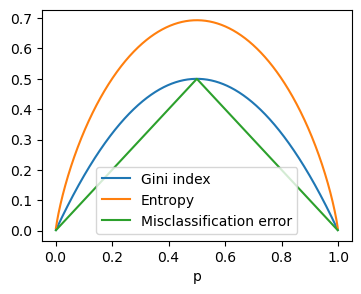

In [9]:
fig, ax = plt.subplots(1, figsize=(4, 3))

p = np.arange(0.001, 1, 0.001)

y_gini = 2 * p * (1-p)
y_misclass = 1 - np.maximum(p, 1-p)
y_entropy = -p * np.log(p) - (1-p) * np.log(1-p)

ax.plot(p, y_gini, label="Gini index")
ax.plot(p, y_entropy, label="Entropy")
ax.plot(p, y_misclass, label="Misclassification error")

ax.set_xlabel('p')
plt.legend()
plt.show()

### How should grow the tree: Cost-Complexity Pruning

Large tree overfit the data and small tree doesn't capture the important structure

Two basics strategies to limit the size of the tree:
- Set a split limit, such that if the number of observations is below a threshold the node is a terminal node.
- Split a node only if the decrease in sum-of-squares due to the split exceeds some threshold. That is, $t$ is not split if $L(t)<threshold$. But a "bad" split doesn't ensure that the next split will be "bad". 

#### Framework

A more elaborate strategy consist of pruning the tree depending on a tuning parameter linked to  the tree size: <strong>cost-complexity pruning</strong>

Notations:
- A large tree $T^0$
- $T\subset\ T^0$ obtained by pruning the internal node (non-terminal) of $T$ such as $T=T^0 - T_t$
- $|T|$ the number of terminal node of $T$ tree

Cost complexity criterion with $\alpha\geq0$:

$$C_\alpha\left(T\right)=L(T)+\alpha\left|T\right|$$
The tuning parameter $\alpha$ governs the tradeoff between tree size and its goodness of fit to the data.

If the value of $\alpha$ is:
- Large then $T$ is a small tree
- Small then $T$ is a large tree
- 0 then $T^0=T$

The aim of this strategy is to find the subtree that minimizes $C_{\alpha}(T)$. It appears that there is a unique smallest subtree that minimizes $C_{\alpha}(T)$ for each $\alpha$.

#### Which $\alpha$ should we select?

The estimation of $\alpha$s is achieve by cross-validation. But before the $\alpha$s to test could be determine with the training set by searching the subtree $T_t$ pruning the tree $T$ which minimizes the increase in the loss function. 

Therefore we need to minimize the following formula, 

$$C_{\alpha}(T-T_t) - C_{\alpha}(T)$$

Which is equivalent to minimize,

$$\alpha=\frac{L\left(t\right)-L\left(T_t\right)}{\left|T_t\right|-1}$$

This minimization is achieved step by step, by beginning with $T^0$ and finishing with the tree $T^n$ with only one root node.

#### Algorithm

Sets $i = 0$

while $T^i$ is not only a root node:
- Finds the node $t$ which minimizes $\frac{L\left(t\right)-L\left(T_{t}^{i}\right)}{\left|T_t^{i}\right|-1}$
- Sets $\alpha_{i} = \frac{L\left(t\right)-L\left(T_{t}^{i}\right)}{\left|T_t^{i}\right|-1}$
- Sets $T^{i+1} = T^{i} - T_{sub}^{i}$
- $i = i + 1$

Finally we obtain a sequence of alpha to test via cross-validation.

### 9.2.4 Other Issues

##### Categorical Predictors

Splitting predictor:
- Quantitative with $q$ values: $2^{q-1} - 1$ partitions
- Binary: 1 possible partition

##### The Loss Matrix

Misclassifying observations could have more serious consequences in some classes than others.

To reduce this risk, it defines a $(K\times K)$ loss matrix $L$, with $L_{k,k'}$ being the loss incured for classifying a class $k$ obervation as $k'$.

How incorporate the losses into the modeling process:
- For multiclass: In the impurity function for e.g., in the Gini index such that, $\sum_{k\neq k^\prime}{L_{k,k^\prime}{\hat{p}}_{m,k}{\hat{p}}_{m,k^\prime}}$
- For binary classification: To weight the observation in classe $k$ with $L_{k,k'}$

##### Missing Predictor Values

In case of missing values in some or all the variables two possible "sub-optimal" strategies are:
- Discard the observations with missing values, which implies a strong loss of information
- Fill the missing value with the mean of nonmissing observations

For tree there are two better approaches:
- In case of categorical predictor, create a new category "missing" to see the behavior of this category with respect to non-missing observations.
- 

##### Why binary split?

It is sometimes useful to split a node into more than two groups, but this is not a good general strategy because it can fragment the data too quickly and leave insufficient data for the next level. Binary splits are preferred because they can be achieved through a series of multiway splits.

##### Other Tree-Building Procedures

Instead to have a split such that $X_j \le s$ we could split along linear combinations such that $\sum{a_jX_j}\le\ s$ with $a_j$ and $s$ which are optimized to minimize the relevant criterion.
This alternative could improve the predictive power of the tree but the interpretability decreases.

A better way to incorporate linear combination splits is in the hierarchical mixtures
of experts (HME) model (section 9.5).

##### Instability of Trees

One major problem with trees is their high variance.

Often small change in the data -> Very different series of splits -> Precarious interpretation

The major reason for this instability is the hierarchical nature of the process: the effect of an error in the top split is propagated down to all of the splits below it. 

The use of a more stable splitting criterion could partially alleviate this instabillity.

##### Lack of Smoothness

Tree predictions are not smooth ->  Potentital issue in regression where the function is often assumed to be smooth -> Can negatively impact model performance 

The MARS (Multivariate Adaptive Regression Splines) method (section 9.4), is a modified version of CART (Classification and Regression Trees) that addresses this issue by creating a smooth prediction surface. 

In classification tasks with 0/1 loss, the lack of smoothness may have a lesser impact on performance since bias in estimation of the class probabilities has a limited effect.

### 9.2.5 Spam Example (Continued)

#### Data

In [10]:
import pandas as pd

In [11]:
# Load Data
data = pd.read_csv("../../data/spam.csv", sep=";")
data.head()

,test,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [12]:
# Prepare data
target = "spam"
test_id = "test"

features = list(data.columns)
features.remove(target)
features.remove(test_id)

data_train = data.loc[data['test'] == 0]
data_test = data.loc[data['test'] == 1]

X_train = data_train[features]
X_test = data_test[features]

y_train = data_train[target]
y_test = data_test[target]

#### Classification tree: search best alpha

In [13]:
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier

if "../globalmethod" not in sys.path:
    sys.path.append("../globalmethod")

import errormodel

In [14]:
# Applied the two standard error rule.

cls_tree = DecisionTreeClassifier(criterion="entropy")
path_alpha = cls_tree.cost_complexity_pruning_path(X_train, y_train)
cpp_alpha = list(path_alpha['ccp_alphas'][::-1])

cls_tree_select = errormodel.StandardErrorRule(cls_tree,
                                               "ccp_alpha",
                                                cpp_alpha,
                                                True,
                                                std_dist_to_mean=2
                                               ).fit_cv(X_train, y_train)

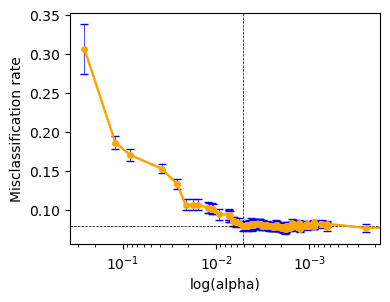

In [15]:
ax = cls_tree_select.plot_rule_selection()
ax.set_xscale("log")
ax.set_xlabel("log(alpha)")
ax.set_ylabel("Misclassification rate")
ax.invert_xaxis()
plt.show()

In [16]:
# The selected tree is highly sensitive to the randomness of one standard
# error rule, the number of leaves varies between 17 and 61!
# Or we can use a cross-validation and selected the alpha
# with the lowest mean (in general the tree will be bigger but the error
# will be smaller)
n_leaves_select_model = cls_tree_select.model_.get_n_leaves()
print(f"The selected tree has {n_leaves_select_model} leaves.")

The selected tree has 23 leaves.


#### Plot decision tree

In [17]:
from sklearn import tree

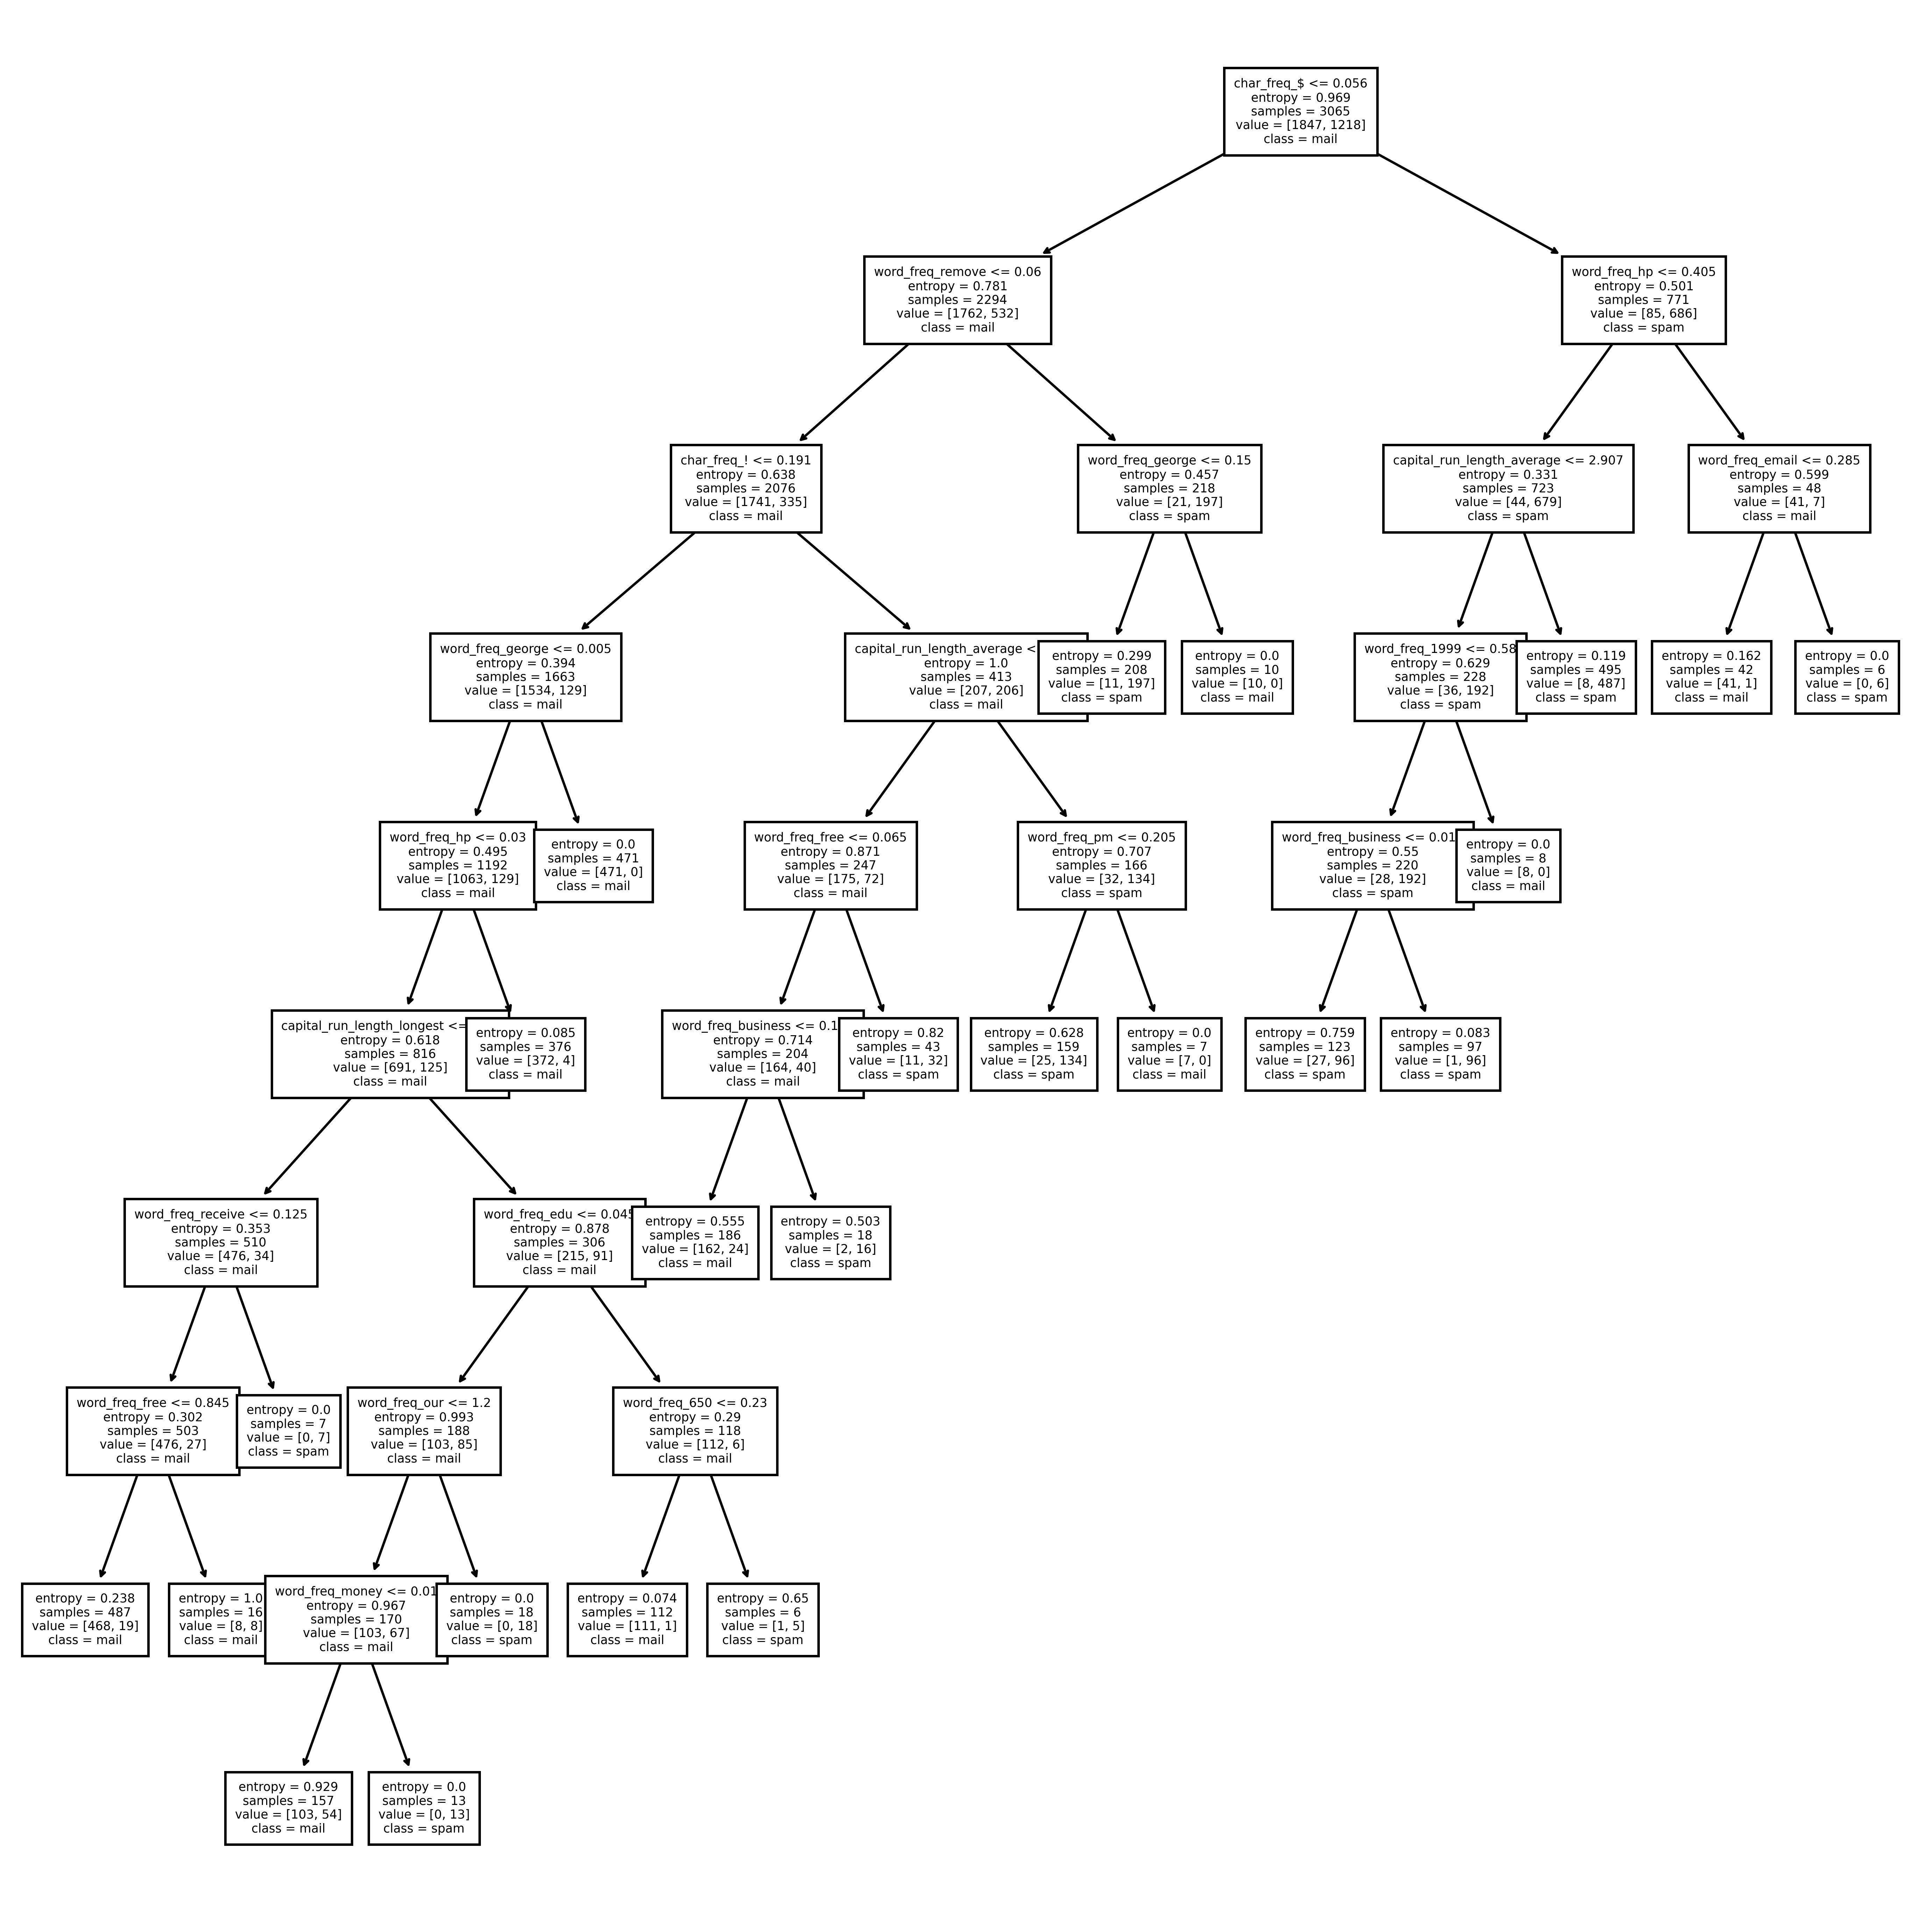

In [18]:
plt.figure(figsize=(14,14), dpi=500)
tree.plot_tree(cls_tree_select.model_, feature_names=features,
               class_names=["mail", "spam"], fontsize=5)
plt.show()

#### Confusion matrix

The confusion matrix indicates the number or proportion of correct and incorrect predictions. In case of binary classification whe have the following matrix,

<table>
<tbody>
  <tr>
    <td colspan="2" rowspan="2"></td>
    <td colspan="2">Predicted</td>
  </tr>
  <tr>
    <td>-</td>
    <td>+</td>
  </tr>
  <tr>
    <td rowspan="2">Actual</td>
    <td>-</td>
    <td>TN</td>
    <td>FP</td>
  </tr>
  <tr>
    <td>+</td>
    <td>FN</td>
    <td>TP</td>
  </tr>
</tbody>
</table>

TP: True Positive
<br>
TN: True Negative
<br>
FP: False Positive
<br>
FN: False Negative

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

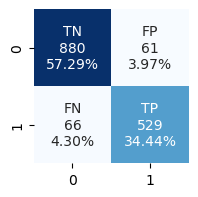

In [20]:
# Target predictions on the test data
y_test_pred = cls_tree_select.predict(X_test)

# Classification matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)

# Seaborn plot
group_name = ["TN", "FP", "FN", "TP"]
group_count = ["{0:0.0f}".format(value) 
               for value in cf_matrix.flatten()]
group_percentage = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten() / np.sum(cf_matrix)]
label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_name, group_count, group_percentage)]
label = np.asarray(label).reshape(2, 2)

plt.figure(figsize = (2, 2))

sns.heatmap(cf_matrix, annot=label, fmt="", cmap='Blues', cbar=False)

plt.show()

#### Sensitivity and Specificity

For binary classification, sensitivity and specificity quantify the performance of the model in each class such that,

$$sensitivity=\frac{TP}{TP+FN}$$ 

$$specificity=\frac{TN}{TN+FP}$$

In [21]:
def sensitivity(TP, FN) -> float:
    return TP / (TP + FN)

def specificity(TN, FP) -> float:
    return TN / (TN + FP)

#### ROC curve

By default many libraries set the decision threshold at 0.5. However, changing this threshold may change the value of sensitivity and specificity and be favorable in some classification problems. In the case of e-mail classification, we favour specificity over sensitivity. 

The ROC curve is a parametric function which indicates the value of specificity and sensitivity according to the threshold such that,
$$ROC:threshold\mapsto\left(sensitivity\left(threshold\right),specificity\left(threshold\right)\right)$$

In [22]:
y_test_proba = cls_tree_select.model_.predict_proba(X_test)[:,1]

##### With sklearn

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve

In [24]:
fpr, sensi, thresholds = roc_curve(y_test, y_test_proba)
spec = 1 - fpr

##### Without sklearn

In [25]:
def roc_curve_m(y_true: np.array,
                y_pred_proba: np.array,
                thresholds: np.array) -> np.ndarray:
    
    sensi = []
    spec = []
    
    # Loop through each threshold
    for threshold in thresholds:
        # Convert probabilities to binary predictions
        y_pred = np.copy(y_pred_proba)
        mask_above = y_pred >= threshold
        mask_below = y_pred < threshold
        y_pred[mask_above] = 1
        y_pred[mask_below] = 0
        
        # Initialize counts for true positive, false positive, true negative,
        # and false negative
        TP = 0
        FP = 0
        TN = 0
        FN = 0
        
        # Loop through each pair of true and predicted labels
        for y_t, y_p in zip(y_true, y_pred):
            # Increment count based on true and predicted labels
            if y_t == 1 and y_p == 1:
                TP += 1
            elif y_t == 0 and y_p == 1:
                FP +=1
            elif y_t == 0 and y_p == 0:
                TN +=1
            elif y_t == 1 and y_p == 0:
                FN +=1
        
        # Calculate sensitivity and specificity according to the threshold
        sensi.append(sensitivity(TP, FN))
        spec.append(specificity(TN, FP))
        
    return spec, sensi

spec_m, sensi_m = roc_curve_m(y_test, y_test_proba, thresholds)

##### Plot ROC curve

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

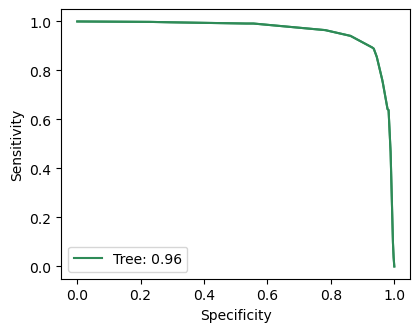

In [27]:
fig, ax = plt.subplots(figsize=(4.5, 3.5))

ax.plot(spec, sensi, color="seagreen",
        label=f"Tree: {roc_auc_score(y_test, y_test_proba):.2f}")
ax.plot(spec_m, sensi_m, color="seagreen")

ax.set_xlabel("Specificity")
ax.set_ylabel("Sensitivity")

plt.legend()
plt.show()